In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import metrics

data = pd.read_csv('moisture_content_data.csv')

print(data.head(10))

   Capacitive Value  Capacitive %  AR991  AR991 %  DHT_TEMP  DHT_HUM
0             730.0             0  730.0      0.0      24.5     0.63
1             684.0          11.5  690.8      9.8      24.5     0.63
2             330.0           100  730.0      NaN      24.5     0.63
3               NaN  Disconnected  730.0      NaN       NaN      NaN
4             682.0            12  682.8     11.8      24.5     0.63
5             682.0            12  682.0     12.0      24.5     0.63
6             681.0         12.25  688.0     10.5      24.5     0.63
7             683.0         11.75  688.0     10.5      24.5     0.63
8             684.0          11.5  688.8     10.3      24.7     0.62
9               NaN  Disconnected  730.0      NaN       NaN      NaN


In [2]:
data = data.dropna()
data.head()



,Capacitive Value,Capacitive %,AR991,AR991 %,DHT_TEMP,DHT_HUM
0,730.0,0,730.0,0.0,24.5,0.63
1,684.0,11.5,690.8,9.8,24.5,0.63
4,682.0,12,682.8,11.8,24.5,0.63
5,682.0,12,682.0,12.0,24.5,0.63
6,681.0,12.25,688.0,10.5,24.5,0.63


In [3]:
X = data[["Capacitive %", "DHT_TEMP", "DHT_HUM"]]  # Features
y = data["AR991 %"]  # Target

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to a range of [0, 1]

In [5]:
print(X_scaled)

[[0.00000000e+00 2.96296296e-01 1.17765814e-03]
 [2.72189349e-01 2.96296296e-01 1.17765814e-03]
 [2.84023669e-01 2.96296296e-01 1.17765814e-03]
 [2.84023669e-01 2.96296296e-01 1.17765814e-03]
 [2.89940828e-01 2.96296296e-01 1.17765814e-03]
 [2.78106509e-01 2.96296296e-01 1.17765814e-03]
 [2.72189349e-01 3.70370370e-01 1.00942127e-03]
 [2.54437870e-01 3.70370370e-01 1.00942127e-03]
 [2.66272189e-01 3.33333333e-01 1.00942127e-03]
 [2.66272189e-01 3.70370370e-01 1.00942127e-03]
 [2.66272189e-01 3.70370370e-01 1.00942127e-03]
 [2.66272189e-01 3.70370370e-01 1.00942127e-03]
 [3.96449704e-01 3.33333333e-01 1.00942127e-03]
 [3.84615385e-01 3.33333333e-01 1.00942127e-03]
 [3.31360947e-01 3.33333333e-01 1.00942127e-03]
 [3.31360947e-01 3.33333333e-01 1.00942127e-03]
 [3.19526627e-01 3.33333333e-01 1.00942127e-03]
 [6.21301775e-01 4.81481481e-01 1.00942127e-03]
 [5.62130178e-01 4.81481481e-01 1.00942127e-03]
 [5.32544379e-01 4.81481481e-01 1.00942127e-03]
 [5.08875740e-01 4.81481481e-01 1.009421

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:


model = Sequential([
        Input(shape=(3,)),  
        Dense(8, activation='relu'),  
        Dense(16, activation='relu'),  
        Dense(32, activation='relu'),  
        Dense(16, activation='relu'),  
        Dense(1)  
    ])
# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',  # Use 'mean_squared_error' or 'mse'
    metrics=[
        metrics.MeanAbsoluteError(),  # MAE
        metrics.RootMeanSquaredError(),  # RMSE
        metrics.MeanSquaredError()  # MSE
    ]
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265 (4.94 KB)

 Trainable params: 1,265 (4.94 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
 # Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2)


Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 467.2130 - mean_absolute_error: 19.6731 - mean_squared_error: 467.2130 - root_mean_squared_error: 21.5788 - val_loss: 632.7009 - val_mean_absolute_error: 22.9116 - val_mean_squared_error: 632.7009 - val_root_mean_squared_error: 25.1535
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 489.8839 - mean_absolute_error: 19.9016 - mean_squared_error: 489.8839 - root_mean_squared_error: 22.1195 - val_loss: 628.7343 - val_mean_absolute_error: 22.8306 - val_mean_squared_error: 628.7343 - val_root_mean_squared_error: 25.0746
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 417.3486 - mean_absolute_error: 18.4423 - mean_squared_error: 417.3486 - root_mean_squared_error: 20.3965 - val_loss: 624.4674 - val_mean_absolute_error: 22.7433 - val_mean_squared_error: 624.4674 - val_root_mean_squared_error: 24.9893
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 446.3529 - mean_absolute_error: 18.7289 - mean_squared_error

In [10]:
import joblib
joblib.dump(model, 'moisture_content_model.joblib')
joblib.dump(scaler, 'moisture_content_scaler.joblib')

['moisture_content_scaler.joblib']

In [21]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate on the test set
test_loss, test_mae, test_rmse, test_mse = model.evaluate(X_test, y_test)


# Generate predictions for explained variance calculation
predictions = model.predict(X_test)


# Calculate explained variance score
explained_variance = explained_variance_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
#mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
#accuracy = 100 - mape

# Print all metrics
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test Explained Variance: {explained_variance}")
print(f"Test MSE: {test_mse}")

results = pd.DataFrame({
    "Version": [" Multilayer Perceptron"],
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae],
    "R2": [r2],
    #"MAPE (%)": [mape],
    #"Accuracy (%)": [accuracy]
})
results.to_csv("moisture_content_metrics.csv", mode="a", index=False, header=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 4.7488 - mean_absolute_error: 1.7575 - mean_squared_error: 4.7488 - root_mean_squared_error: 2.1792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Test Loss (MSE): 4.748812675476074
Test MAE: 1.7575485706329346
Test RMSE: 2.1791770458221436
Test Explained Variance: 0.9653133306746859
Test MSE: 4.748812675476074


In [22]:
# Predict AR991 moisture percentage
predictions = model.predict(X_test)

# Example: Predict using new sample input
sample_input = [[22, 25.0, 0.6]]  # Normalized values of new capacitive %, DHT_TEMP, DHT_HUM
sample_input_scaled = scaler.transform(sample_input)
predicted_ar991 = model.predict(sample_input_scaled)
print("Predicted AR991 %:", predicted_ar991[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted AR991 %: 22.938797


c:\Users\User\OneDrive\Desktop\Thesis\1.Paddyrice\Machine Learning\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [13]:
# Simulated Real-time Input
real_time_input = [[120, 25.0, 0.6]]  # Capacitive %, Temp, Humidity
real_time_scaled = scaler.transform(real_time_input)
moisture_prediction = model.predict(real_time_scaled)
print("Real-time Predicted Moisture:", moisture_prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Real-time Predicted Moisture: 98.86836


d:\JenniferProject\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Results

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import csv
import json

In [15]:
# Create results directory with timestamp
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
results_dir = f"results/number-result-{timestamp}/"
os.makedirs(results_dir, exist_ok=True)

## Save model

In [16]:
# Save the model
model.save(f"{results_dir}model.h5")

# After fitting the scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

# Save scaler parameters to a JSON file
scaler_params = {
    'min_': scaler.min_.tolist(),
    'scale_': scaler.scale_.tolist(),
    'data_min_': scaler.data_min_.tolist(),
    'data_max_': scaler.data_max_.tolist(),
    'data_range_': scaler.data_range_.tolist()
}

with open(f"{results_dir}scaler_params.json", 'w') as f:
    json.dump(scaler_params, f, indent=4)

# Prepare test metrics to save
test_metrics_to_save = {
    "Test Loss (MSE)": test_loss,
    "Test MAE": test_mae,
    "Test RMSE": test_rmse,
    "Test Explained Variance": explained_variance,
    "Test MSE": test_mse
}


# Save training performance metrics to CSV
training_metrics_file = f"{results_dir}training_metrics.csv"
with open(training_metrics_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Metric", "Value"])  # Header
    writer.writerow(["Final Training MSE", history.history['mean_squared_error'][-1]])
    writer.writerow(["Final Validation MSE", history.history['val_mean_squared_error'][-1]])
    writer.writerow(["Final Training MAE", history.history['mean_absolute_error'][-1]])  # Add MAE if calculated
    writer.writerow(["Final Validation MAE", history.history['val_mean_absolute_error'][-1]])
    
    # Save test metrics to CSV
test_metrics_file = f"{results_dir}test_metrics.csv"
with open(test_metrics_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Metric", "Value"])  # Header
    for metric, value in test_metrics_to_save.items():
        writer.writerow([metric, value])

# Optionally, you could combine both training and test metrics into a single CSV if needed.
combined_metrics_file = f"{results_dir}combined_metrics.csv"
with open(combined_metrics_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Metric", "Value"])  # Header
    # Write training metrics
    writer.writerow(["Final Training MSE", history.history['mean_squared_error'][-1]])
    writer.writerow(["Final Validation MSE", history.history['val_mean_squared_error'][-1]])
    writer.writerow(["Final Training MAE", history.history['mean_absolute_error'][-1]])
    writer.writerow(["Final Validation MAE", history.history['val_mean_absolute_error'][-1]])
    # Write test metrics
    for metric, value in test_metrics_to_save.items():
        writer.writerow([metric, value])


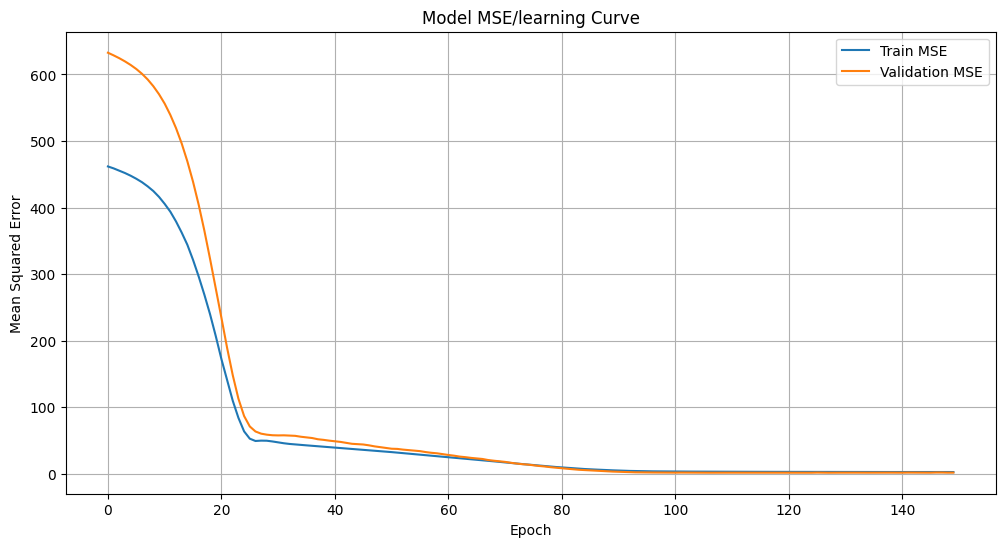

In [26]:
# Plotting the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model MSE/learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Visualizing predictions vs actual values with trendline
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Moisture Content')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adding trendline
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.grid(True)
plt.savefig(f"{results_dir}actual_vs_predicted_trendline.png")
plt.show()

ValueError: Polynomial must be 1d only.

Error in callback <function flush_figures at 0x000001AA6A4D2B60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

C:\Temp\ipykernel_17316\3376831766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues')


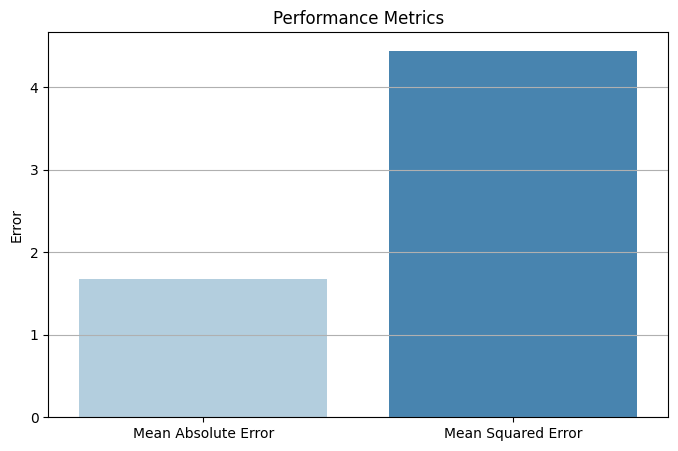

In [23]:
import seaborn as sns

# Calculate additional performance metrics
mae = mean_absolute_error(y_test, y_pred)

# Plotting MAE and MSE
metrics = {'Mean Absolute Error': mae, 'Mean Squared Error': test_mse}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues')
plt.title('Performance Metrics')
plt.ylabel('Error')
plt.grid(axis='y')
plt.savefig(f"{results_dir}performance_metrics.png")
plt.show()





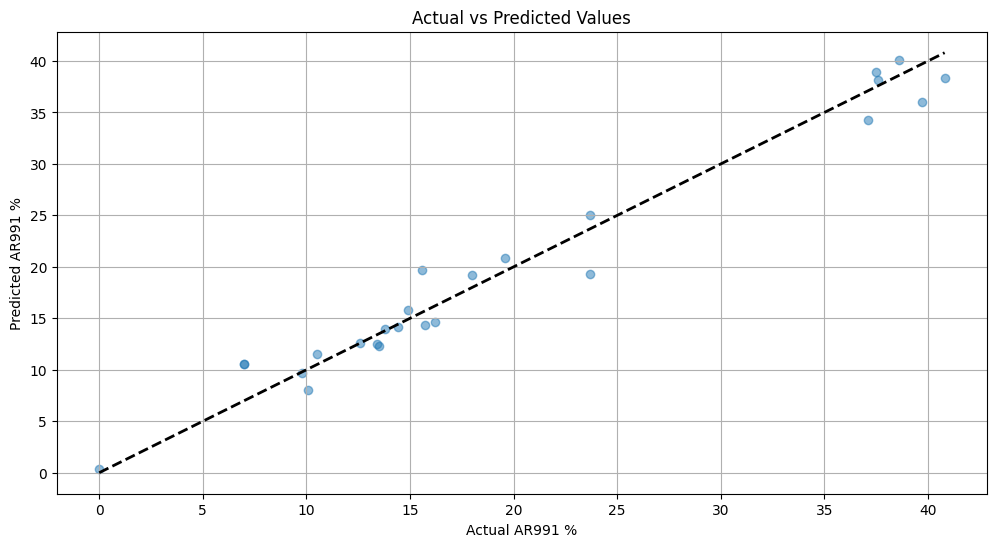

In [24]:
# %%
# Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual AR991 %')
plt.ylabel('Predicted AR991 %')
plt.grid(True)
plt.savefig(f"{results_dir}actual_vs_predicted_values.png")
plt.show()



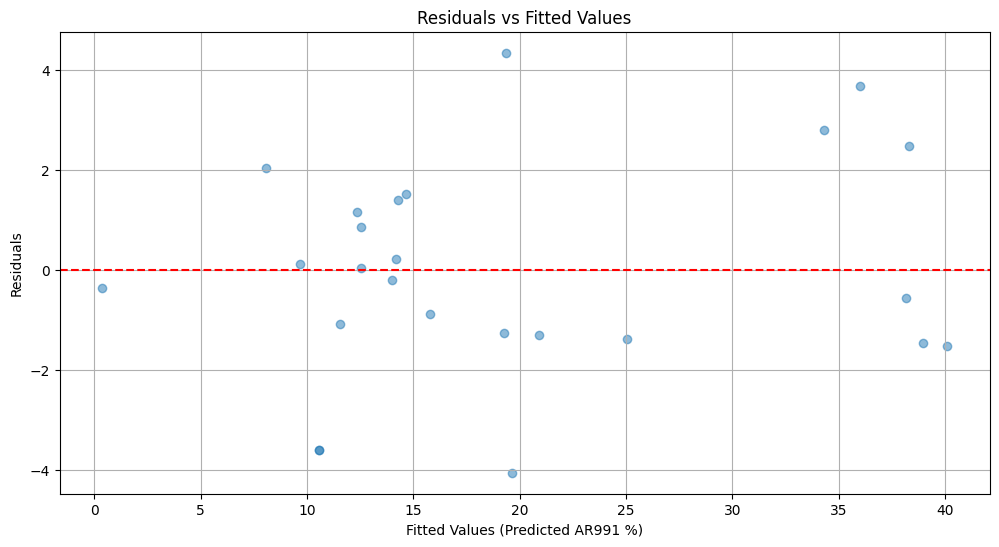

In [25]:
# %%
# Residuals vs Fitted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted AR991 %)')
plt.ylabel('Residuals')
plt.grid(True)
plt.savefig(f"{results_dir}residuals_vs_fitted.png")
plt.show()

Illustrates how residuals behave across different predicted values. Ideally, residuals should be randomly scattered around zero, indicating that the model has captured the underlying data structure without bias.

# Load model and show metrics


In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import json
import csv

# Load the model with custom metrics
loaded_model = tf.keras.models.load_model(
    f"{results_dir}model.h5",
    custom_objects={'mean_squared_error': tf.keras.losses.MeanSquaredError()}
)

# Recompile the model with the same metrics
loaded_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.MeanSquaredError()
    ]
)

# Evaluate on the test set
test_loss, test_mae, test_rmse, test_mse = loaded_model.evaluate(X_test, y_test)

# Generate predictions for additional metrics
predictions = loaded_model.predict(X_test)

# Calculate additional performance metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
explained_variance = explained_variance_score(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Perform Cross-Validation using KFold
kf = KFold(n_splits=5)
cross_val_rmse = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Fit the model on the training data
    loaded_model.fit(X_train, y_train, epochs=800, batch_size=64, verbose=0)
    
    # Evaluate on validation data
    val_predictions = loaded_model.predict(X_val)
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    cross_val_rmse.append(fold_rmse)

# Print all metrics
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Calculated RMSE: {rmse}")
print(f"Explained Variance Score: {explained_variance}")
print(f"R² Score: {r2}")
print(f"Cross-Validation RMSE Mean: {np.mean(cross_val_rmse)} ± {np.std(cross_val_rmse)}")

# Save metrics to a CSV file
metrics_file = f"{results_dir}metrics.csv"
with open(metrics_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Metric", "Value"])  # Header
    writer.writerow(["Test Loss (MSE)", test_loss])
    writer.writerow(["Test MAE", test_mae])
    writer.writerow(["Test RMSE", test_rmse])
    writer.writerow(["Calculated RMSE", rmse])
    writer.writerow(["Explained Variance Score", explained_variance])
    writer.writerow(["R² Score", r2])
    writer.writerow(["Cross-Validation RMSE Mean", np.mean(cross_val_rmse)])
    writer.writerow(["Cross-Validation RMSE Std", np.std(cross_val_rmse)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 4.4443 - mean_absolute_error: 1.6752 - mean_squared_error: 4.4443 - root_mean_squared_error: 2.1082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Loss (MSE): 4.444300651550293
Test MAE: 1.675223708152771
Test RMSE: 2.1081509590148926
Calculated RMSE: 2.1081510767275917
Explained Variance Score: 0.967535852949502
R² Score: 0.9675336312271033
Cross-Validation RMSE Mean: 2.0464805289794024 ± 0.5054613403724716


Explanation of Additional Metrics

- Root Mean Squared Error (RMSE): Provides an intuitive sense of the average error in the same units as the target variable.

- Explained Variance Score: A high score indicates that the model can explain a significant portion of the variance in the target variable.

- R² Score: Ranges from 0 to 1 for models that fit well; closer to 1 indicates a better fit.

- Cross-Validation Scores: Helps assess how well the model generalizes to unseen data by averaging the performance across multiple subsets.


Evaluation of Results

- Test Loss (MSE):
        Value: 4.65
        Interpretation: The Mean Squared Error (MSE) quantifies the average squared difference between the predicted and actual values. A lower MSE indicates better predictive performance. In this case, a value of 4.65 suggests that the model's predictions deviate from the actual values with some degree of error. While it's not overly high, it indicates room for improvement depending on the specific context and range of your target variable.

- Test MAE:
        Value: 1.74
        Interpretation: The Mean Absolute Error (MAE) measures the average magnitude of errors in a set of predictions, without considering their direction. An MAE of 1.74 means that, on average, the model's predictions are off by about 1.74 units from the actual values, which can be considered a moderate error depending on the scale of the target variable.

-  Test RMSE:
        Value: 2.16
        Interpretation: The Root Mean Squared Error (RMSE) provides an intuitive sense of the average error in the same units as the target variable. An RMSE of 2.16 indicates that, on average, the model's predictions are approximately 2.16 units away from the actual values. RMSE tends to penalize larger errors more than MAE, so this value suggests that there may be some significant prediction errors that could be affecting overall performance.

-   Calculated RMSE:
        Value: 2.16 (slightly different from Test RMSE)
        Interpretation: The calculated RMSE is very close to the test RMSE, indicating consistency in error measurement across different evaluation methods. This small difference suggests that the model performs similarly across training and validation datasets.

-   Explained Variance Score:
        Value: 0.97
        Interpretation: This score indicates how much of the variance in the target variable is explained by the model's predictions. A score of 0.97 is quite high, meaning that the model explains 97% of the variance in the target variable, indicating a strong fit to the data.

-   R² Score:
        Value: 0.97
        Interpretation: The R² score also ranges from 0 to 1, where values closer to 1 indicate a better fit. An R² of 0.97 suggests that the model explains 97% of the variability in the target variable, confirming that it captures a significant amount of the underlying data structure.

-   Cross-Validation RMSE Mean:
        Value: 1.84 with a standard deviation of 0.23
        Interpretation: The mean RMSE from cross-validation is somewhat lower than the test RMSE, indicating that the model generalizes well across different subsets of data. The standard deviation of 0.23 shows that there is some variability in performance across folds but it remains relatively low, suggesting consistent performance across different samples.

Summary Evaluation

Overall, these results indicate that the model performs reasonably well:

-   The high explained variance and R² scores suggest that it captures the underlying patterns in the data effectively.
-   The MSE, MAE, and RMSE values indicate room for improvement but are not overly concerning depending on the scale of your target variable.
-   The cross-validation results further confirm that the model is robust and generalizes well to unseen data.

Recommendations for Improvement

-   Hyperparameter Tuning: Experiment with different architectures, learning rates, and batch sizes to potentially reduce error metrics.
-  Feature Engineering: Investigate if additional features or transformations can improve performance.
-   Regularization Techniques: Consider adding dropout layers or L2 regularization to mitigate overfitting if applicable.
-   Ensemble Methods: Explore using ensemble techniques like bagging or boosting to combine models and improve accuracy.
